In [2]:
from importlib import reload
import os
import numpy as np
import time
from tqdm import trange
from pulsestreamer import *
from nidaqmx import *

import analysis
reload(analysis)
from analysis import *

import measurement
reload(measurement)
from measurement import *

In [4]:
# loading the local Pulse Streamer and NIDAQmx
IPaddress = findPulseStreamers(search_serial='')[0][0]
pulser = PulseStreamer(IPaddress)

DAQ_device = nidaqmx.system.System.local().devices[0]
device_name = DAQ_device.terminals[0:1][0][1:5]
print(f'NIDAQmx device name : {device_name}')

Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 169.254.8.2
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0
NIDAQmx device name : Dev1


In [839]:
specs_ports = {'laserNum' : 1, 'gateStart' : 5, 'source' : 7}

specs_delay = {'rising_delay' : 2,'gatelen' :  6, 'laserontime' :  31,'delay_pad' :  2,
               'delay_shift' :  2,'gatesourcedelay' : 2}
specs_t1 = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,
            'delay_shift' : 35e3,'gatesourcedelay' : 5,'evolution_time' : 0.35e6}
specs_snr = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,
             'delay_shift' : 150e3,'gatesourcedelay' : 5,'evolution_time' : 1.5e6}

specs_lifetime = {'rising_delay' : 2,'gatelen' : 2, 'laserontime' : 25,'laserofftime' : 50,
                  'delay_pad' : 2,'delay_shift' : 2,'gatesourcedelay' : 2}  
specs_t1_ir = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,
            'delay_shift' : 45e3,'gatesourcedelay' : 5,'evolution_time' : 0.45e6,'irontime' : 1e3,'irport' : 3}
specs_t1_simple = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,
            'delay_shift' : 35e3,'gatesourcedelay' : 5,'evolution_time' : 0.35e6}

In [1075]:
total_specs = merge(specs_ports,specs_t1)

In [1077]:
# plot_sequence(pulser=pulser,exp_name='t1_simple',specifications=total_specs)

In [1093]:
avg_data,time_axis = measure(pulser,DAQ_device,device_name,exp_name = 't1',
                   samples=1500,averages=15,specifications=total_specs)

number of steps : 10
Pixel : 30000
creating sequence
starting DAQ
Preparing Ni Daq for the experiment
callback number in beginning: 0


  0%|          | 0/15 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10


  7%|▋         | 1/15 [00:03<00:51,  3.65s/it]

callback number after 1-th average end: 10
1
2
3
4
5
6
7
8
9
10


 13%|█▎        | 2/15 [00:07<00:47,  3.66s/it]

callback number after 2-th average end: 20
1
2
3
4
5
6
7
8
9
10


 20%|██        | 3/15 [00:10<00:43,  3.66s/it]

callback number after 3-th average end: 30
1
2
3
4
5
6
7
8
9
10


 27%|██▋       | 4/15 [00:14<00:40,  3.66s/it]

callback number after 4-th average end: 40
1
2
3
4
5
6
7
8
9
10


 33%|███▎      | 5/15 [00:18<00:36,  3.66s/it]

callback number after 5-th average end: 50
1
2
3
4
5
6
7
8
9
10


 40%|████      | 6/15 [00:21<00:32,  3.66s/it]

callback number after 6-th average end: 60
1
2
3
4
5
6
7
8
9
10


 47%|████▋     | 7/15 [00:25<00:29,  3.66s/it]

callback number after 7-th average end: 70
1
2
3
4
5
6
7
8
9
10


 53%|█████▎    | 8/15 [00:29<00:25,  3.67s/it]

callback number after 8-th average end: 80
1
2
3
4
5
6
7
8
9
10


 60%|██████    | 9/15 [00:32<00:21,  3.66s/it]

callback number after 9-th average end: 90
1
2
3
4
5
6
7
8
9
10


 67%|██████▋   | 10/15 [00:36<00:18,  3.66s/it]

callback number after 10-th average end: 100
1
2
3
4
5
6
7
8
9
10


 73%|███████▎  | 11/15 [00:40<00:14,  3.66s/it]

callback number after 11-th average end: 110
1
2
3
4
5
6
7
8
9
10


 80%|████████  | 12/15 [00:43<00:11,  3.67s/it]

callback number after 12-th average end: 120
1
2
3
4
5
6
7
8
9
10


 87%|████████▋ | 13/15 [00:47<00:07,  3.67s/it]

callback number after 13-th average end: 130
1
2
3
4
5
6
7
8
9
10


 93%|█████████▎| 14/15 [00:51<00:03,  3.66s/it]

callback number after 14-th average end: 140
1
2
3
4
5
6
7
8
9
10


100%|██████████| 15/15 [00:54<00:00,  3.66s/it]

callback number after 15-th average end: 150
Total Run : 150
Total Counts & Counts in one average : (450000, 30000)
Crosscheck number of averges= 15
returning averaged counts and time_axis


In [1095]:
dict_args = {'avg_data':avg_data,'time_axis':time_axis}

In [1097]:
root_directory = os.getcwd()
print(f'root directory : {root_directory}')

root directory : C:\Users\Administrator\OneDrive\Desktop\T1_measurement\atanu_github\Instrument_Automation\Experimental_Applications


In [1099]:
year = time.ctime()[-4:]
date = time.ctime()[4:10].replace(' ','_')
current_time = time.ctime()[-13:-8].replace(':','_')

folder_path = root_directory+f'/exp_data/{year}/{date}/microdiamonds/t1/525nm/with_Gd/avgs_15/samples_1500/second_sample/first_cluster/'
file_name = f'[{current_time}]_gate_2000ns.npz'

total_path = npz_save(folder_path,file_name,**dict_args)

saving data_file '[16_55]_gate_2000ns.npz' is successful!



In [1101]:
load_data = dict(np.load(total_path))

In [1103]:
samples=int(input('Enter the no of samples'))

# time_axis,signal_photon,reference_samples,signal_samples = data_to_time_signal(load_data,samples,first='signal')
time_axis,signal_photon,reference_samples,signal_samples = data_to_time_signal(load_data,samples,first='reference')

Enter the no of samples 1500


In [ ]:
# steps=int(input('Enter the no of steps'))
# samples=int(input('Enter the no of samples'))

# # Separating Reference and Signal and averaging over Samples
# reference_samples = np.mean(np.reshape(load_data['avg_data'][::2],(steps,samples)),axis=1)
# signal_samples = np.mean(np.reshape(load_data['avg_data'][1::2],(steps,samples)),axis=1)
# signal_photon = signal_samples/reference_samples

Lifetime in nano_second is : 484611.9 ± 250581.4



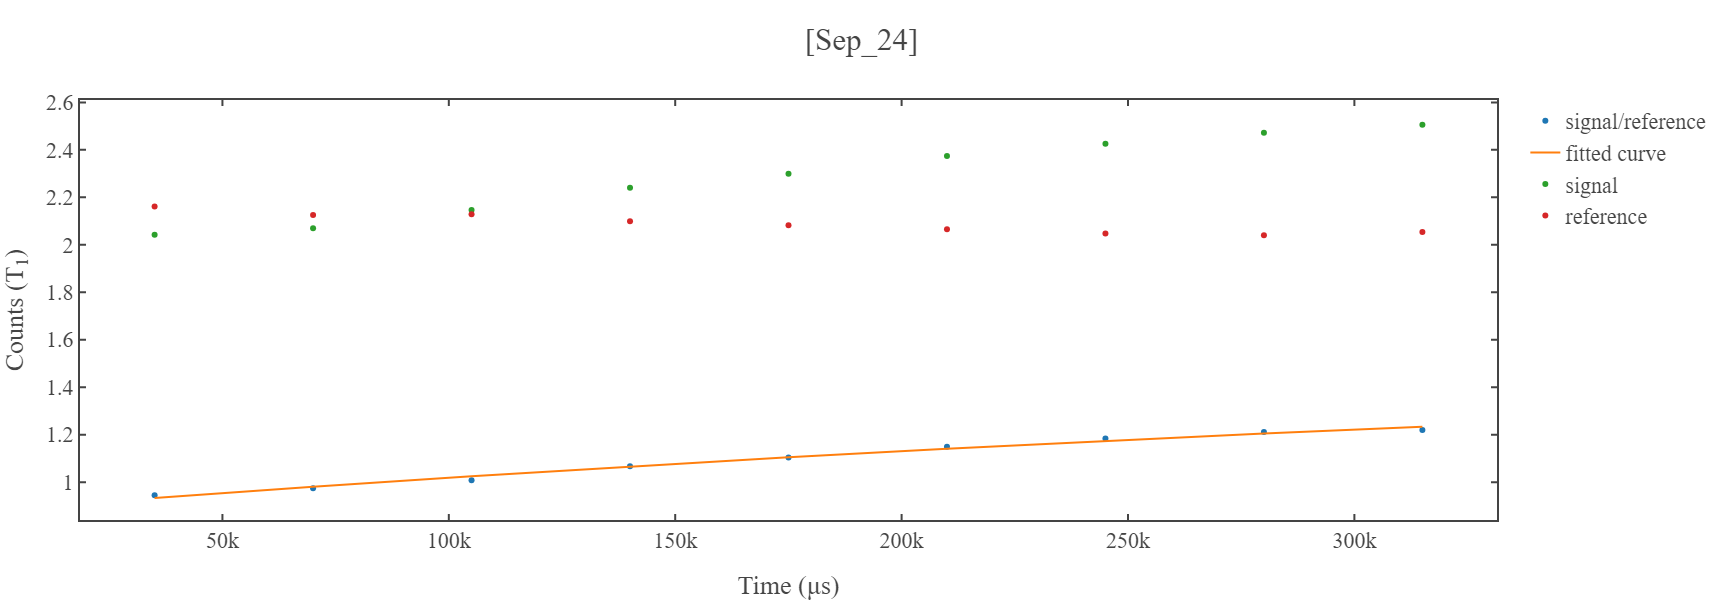

In [1105]:
x=time_axis[1:]
y=signal_photon[1:]

x_fit,y_fit,coefficient,error_bars = fit_func(x,y,fit_range=False,func='exp',guess_params=np.array([0.7,0.9,0.08e6]))

fig1 = simple_plot(x,y,show=False,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='markers',title=f'{date}',curve_name='signal/reference')
fig2 = simple_plot(x_fit,y_fit,show=False,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='lines',title=f'{date}',curve_name='fitted curve')
fig3 = simple_plot(x,signal_samples[1:],show=False,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='markers',title=f'{date}',curve_name='signal')
fig4 = simple_plot(x,reference_samples[1:],show=False,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='markers',title=f'{date}',curve_name='reference')


add_figures([fig1,fig2,fig3,fig4],show=True,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",title=f'[{date}]')

## Add calibrations, specifications and few reference plots

sep 24 

1. with only thin glass slide without cover slip.
2. datas are not good and there is no trend in signal and reference( with T1 and T1 simple) without pulse.
3. We got reverse trend with pulses and reference was kind of constant.
4. Yesterday we also got reverse trend in sig/ref but then signal and reference were decaying exponentially.
5. After 1.17pm, we added Gd(0.1 molar - 10-15 microlitter ) on the same cluster.
6. The T1 lifetime measured by t1_simple sequence was less than t1 sequence.
7. The initial nature of the reference signal was reverse for t1_simple and t1 sequence.

sep 24

[microdiamonds: 500nm,525nm]

sample 2 (3.33pm) [2 microlitter MD+10 microlitter water]
Gd (0.1 molar - 20 microlitter)
After adding Gd, we started from fourth and counted up

|--|---|First cluster|---|
|without Gd|without Gd|with Gd|with Gd|
|---|---|---|---|
|t1|t1_simple|t1|t1_simple|
|377993.0 ± 191656.5|114809.4 ± 33751.7|339729.7 ± 224803.1|110173.8 ± 23564.5|
|363884.6 ± 102700.6|100525.8 ± 23508.9|484611.9 ± 250581.4|107138.6 ± 26226.7|


|--|---|Second cluster|---|
|without Gd|without Gd|with Gd|with Gd|
|---|---|---|---|
|t1|t1_simple|t1|t1_simple|
|422687.6 ± 329115.1|254545.9 ± 81386.0|249458.7 ± 129490.4|335996.5 ± 122350.3|
|342149.2 ± 182741.5|202659.7 ± 52323.6|255755.9 ± 111794.1|373363.6 ± 164207.5|


|--|---|Third cluster|---|
|without Gd|without Gd|with Gd|with Gd|
|---|---|---|---|
|t1|t1_simple|t1|t1_simple|
|363730492.8 ± 615100137631.6 (good sig, not sig/ref)|2748090534.2 ± 1783561161829.9|1675114.9 ± 5538026.5|76518.1 ± 27898.5|
|353241413.3 ± 526383166989.6 (good sig, not sig/ref)|388162031.4 ± 289446072087.4|1214220.2 ± 2242830.3|125444.8 ± 44465.6|



|--|---|Fourth cluster|---|
|without Gd|without Gd|with Gd|with Gd|
|---|---|---|---|
|t1|t1_simple|t1|t1_simple|
|192239.3 ± 46384.6|195890.3 ± 30248.9|666862981.9 ± 438961483044.5 (good sig, not sig/ref)|2347536190.3 ± 589045272609.6|
|230991.6 ± 57184.1|213769.3 ± 40152.9|1725913.8 ± 4821172.1|1069736.8 ± 1707837.5|